行星数据

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

planets = sns.load_dataset('planets')

planets.shape

(1035, 6)

In [2]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))

In [4]:
ser.sum(), ser.median(), ser.mean()

(2.811925491708157, 0.5986584841970366, 0.5623850983416314)

In [5]:
df = pd.DataFrame({'a': rng.rand(5), 'b': rng.rand(5)})

In [6]:
df

,a,b
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [7]:
df.mean()

a    0.477888
b    0.443420
dtype: float64

In [8]:
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [9]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [10]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])

df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [11]:
df.groupby('key')

In [12]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [13]:
planets.groupby('method')['orbital_period']

In [14]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [15]:
for (method, group) in planets.groupby('method'):
    print(f'{method:<30}: shape: {group.shape}')

Astrometry                    : shape: (2, 6)
Eclipse Timing Variations     : shape: (9, 6)
Imaging                       : shape: (38, 6)
Microlensing                  : shape: (23, 6)
Orbital Brightness Modulation : shape: (3, 6)
Pulsar Timing                 : shape: (5, 6)
Pulsation Timing Variations   : shape: (1, 6)
Radial Velocity               : shape: (553, 6)
Transit                       : shape: (397, 6)
Transit Timing Variations     : shape: (4, 6)


In [16]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [17]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [18]:
rng = np.random.RandomState(0)

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],

                   'data1': range(6), 'data2': rng.randint(0, 10, 6)},

                  columns=['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [19]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [20]:
df.groupby('key').max()

,data1,data2
key,,
A,3,5
B,4,7
C,5,9


In [21]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [22]:
def filter_func(x):
    return x['data2'].std() > 4

In [23]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [24]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [25]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [26]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


In [27]:
for (letter, subset) in df.groupby(L):
    print(letter, subset)

0   key  data1  data2
0   A      0      5
2   C      2      3
5   C      5      9
1   key  data1  data2
1   B      1      0
3   A      3      3
2   key  data1  data2
4   B      4      7


In [28]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [29]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2)

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9


In [30]:
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


In [31]:
df2.groupby(str.upper).mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [32]:
df2.groupby([L, str.upper]).mean()

data1  data2
  key              
0 A      0.0    5.0
  C      3.5    6.0
1 A      3.0    3.0
  B      1.0    0.0
2 B      4.0    7.0

In [33]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: decade, Length: 1035, dtype: object

In [34]:
planets.groupby(['method', decade]).sum()

number  orbital_period       mass  \
method                        decade                                      
Astrometry                    2010s        2    1.262360e+03    0.00000   
Eclipse Timing Variations     2000s        5    1.930800e+04    6.05000   
                              2010s       10    2.345680e+04    4.20000   
Imaging                       2000s       29    1.350935e+06    0.00000   
                              2010s       21    6.803750e+04    0.00000   
Microlensing                  2000s       12    1.732500e+04    0.00000   
                              2010s       15    4.750000e+03    0.00000   
Orbital Brightness Modulation 2010s        5    2.127920e+00    0.00000   
Pulsar Timing                 1990s        9    1.900153e+02    0.00000   
                              2000s        1    3.652500e+04    0.00000   
                              2010s        1    9.070629e-02    0.00000   
Pulsation Timing Variations   2000s        1    1.170000e+03    0.00000   
Radial Velocity               1980s        1    8.388800e+01   11.68000   
                              1990s       52    1.091561e+04   68.17820   
                              2000s      475    2.633526e+05  945.31928   
                              2010s      424    1.809630e+05  316.47890   
Transit                       2000s       64    2.897102e+02    0.00000   
                              2010s      712    8.087813e+03    1.47000   
Transit Timing Variations     2010s        9    2.393505e+02    0.00000   

                                       distance    year  
method                        decade                     
Astrometry                    2010s       35.75    4023  
Eclipse Timing Variations     2000s      261.44    6025  
                              2010s     1000.00   12065  
Imaging                       2000s      956.83   40139  
                              2010s     1210.08   36208  
Microlensing                  2000s        0.00   20070  
                              2010s    41440.00   26155  
Orbital Brightness Modulation 2010s     2360.00    6035  
Pulsar Timing                 1990s        0.00    5978  
                              2000s        0.00    2003  
                              2010s     1200.00    2011  
Pulsation Timing Variations   2000s        0.00    2007  
Radial Velocity               1980s       40.57    1989  
                              1990s      723.71   55943  
                              2000s    15201.16  619775  
                              2010s    11382.67  432451  
Transit                       2000s    31823.31  124462  
                              2010s   102419.46  673999  
Transit Timing Variations     2010s     3313.00    8050

In [35]:
planets.groupby(['method', 'year']).sum()

number  orbital_period  mass  distance
method                    year                                        
Astrometry                2010       1     1016.000000  0.00     14.98
                          2013       1      246.360000  0.00     20.77
Eclipse Timing Variations 2008       4     9088.000000  0.00    261.44
                          2009       1    10220.000000  6.05      0.00
                          2010       4     8457.050000  0.00   1000.00
...                                ...             ...   ...       ...
Transit                   2014      93      756.948471  0.00   2070.00
Transit Timing Variations 2011       2      160.000000  0.00   2119.00
                          2012       2       57.011000  0.00    855.00
                          2013       2       22.339500  0.00    339.00
                          2014       3        0.000000  0.00      0.00

[69 rows x 4 columns]

In [36]:
planets.groupby(['method', decade])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [37]:
planets.groupby(['method', decade])['number'].sum().unstack()

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [38]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


数据透视表（pivot table）

In [39]:
titanic = sns.load_dataset('titanic')

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
titanic.groupby(['sex', 'class'])['survived'].sum()

sex     class 
female  First     91
        Second    70
        Third     72
male    First     45
        Second    17
        Third     47
Name: survived, dtype: int64

In [42]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [43]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [44]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [45]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [46]:
titanic.pivot_table('survived', index=['sex', age], columns='class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [47]:
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [48]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [49]:
titanic.pivot_table(values='survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [50]:
titanic.pivot_table(values='survived', index=['sex'], columns=['class'], aggfunc='sum', margins=True)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


美国人的生日

In [51]:
# shell下载数据 # 
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 15  258k   15 41674    0     0   2816      0  0:01:33  0:00:14  0:01:19     0^C


In [52]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [53]:
births.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [54]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,268240,276460


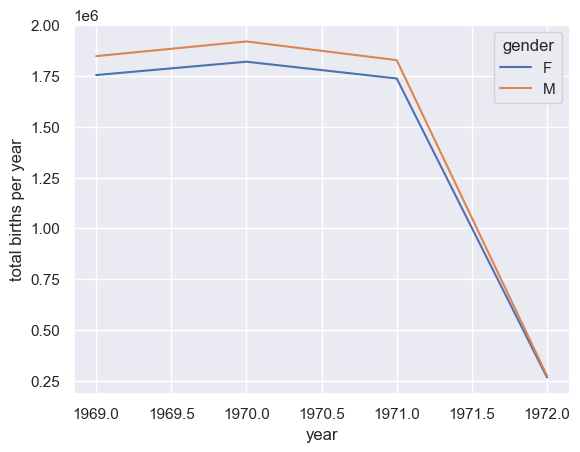

In [55]:
import matplotlib.pyplot as plt

sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')
plt.show()

消除这些异常的简便方法就是直接删除异常值，可 以通过更稳定的 sigma 消除法（sigma-clipping， 按照正态分布标准差划定范围， SciPy 中 默认是四个标准差）操作来实现

In [56]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4590. , 4950. , 5244.5])

In [57]:
mu = quartiles[1]
mu

4950.0

In [58]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

484.33

样本均值的稳定性估计（robust estimate） ，其中 0.74 是指标准正态分布的分位 数间距。在 query() 方法（详情请参见 3.13 节）中用这个范围就可以将有效的生日数据筛 选出来了

In [59]:
births = births.query('(births > @mu -5 * @sig) & (births < @mu + 5 * @sig)')

In [60]:
births.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [61]:
# 将'day'列设置为整数。由于其中含有缺失值null，因此是字符串 
births['day'].dtypes

dtype('int64')

In [62]:
births['day'].astype(int)
births.dtypes

year       int64
month      int64
day        int64
gender    object
births     int64
dtype: object

In [63]:
births['day'] = births['day'].astype(int)

In [64]:
births.dtypes

year       int64
month      int64
day        int64
gender    object
births     int64
dtype: object

In [65]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4


In [66]:
decade = 10 * (births.year // 10)
decade = decade.astype(str) + 's'
births['decade'] = decade

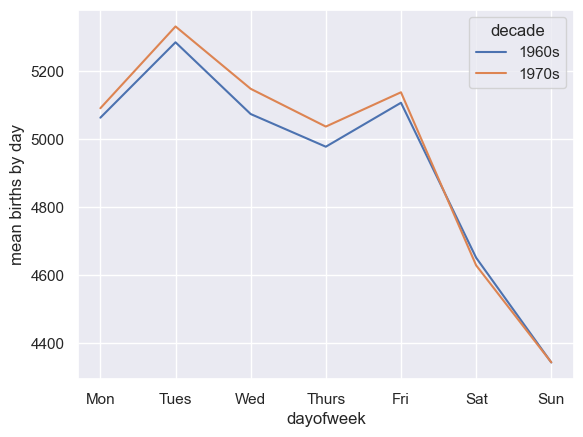

In [67]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticks(range(7))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')
plt.show()

In [68]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date

births
1  1   4174.875000
   2   4407.125000
   3   4554.750000
   4   4608.125000
   5   4716.500000
...            ...
12 27  4718.333333
   28  5189.666667
   29  5601.333333
   30  5720.000000
   31  5251.000000

[366 rows x 1 columns]

In [69]:
import datetime

In [70]:
index = [datetime.date(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.index = index
births_by_date.head()

,births
2012-01-01,4174.875
2012-01-02,4407.125
2012-01-03,4554.750
2012-01-04,4608.125
2012-01-05,4716.500


In [71]:
datetime.datetime(2012, 12, 1)

datetime.datetime(2012, 12, 1, 0, 0)

In [72]:
datetime.date(2012, 12, 1)

datetime.date(2012, 12, 1)

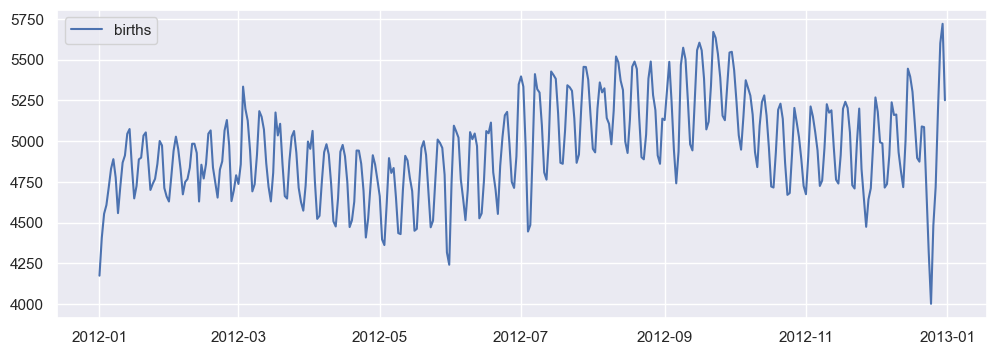

In [73]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [74]:
data = np.array(['Bob', 'William', 'Joe', None, 'Jim'])

In [75]:
name = pd.Series(data)
name

0        Bob
1    William
2        Joe
3       None
4        Jim
dtype: object

In [76]:
name.str.upper()

0        BOB
1    WILLIAM
2        JOE
3       None
4        JIM
dtype: object

In [77]:
name.apply(str.upper)

TypeError: descriptor 'upper' for 'str' objects doesn't apply to a 'NoneType' object

In [80]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [81]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [82]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [83]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


例如找出所有开头和结尾都是辅音字母的名字——这可以用 正则表达式中的开始符号（^）与结尾符号（$）来实现：

In [84]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [85]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [86]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [87]:
monte.str.get(3)

0    h
1    n
2    r
3    c
4    r
5    h
dtype: object

In [88]:
monte.str[3]

0    h
1    n
2    r
3    c
4    r
5    h
dtype: object

In [89]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [90]:
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})

In [91]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


`get_dummies()`方法可以让你快速将这些指标变量分割成一个独热编码的DataFrame（每个元素都是0或1）

In [92]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


食谱数据库

In [ ]:
!curl -O https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz

In [ ]:
!gunzip 20170107-061401-recipeitems.json.gz

In [78]:
try:
    recipes = pd.read_json('20170107-061401-recipeitems.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [93]:
with open('20170107-061401-recipeitems.json') as f: 
    line = f.readline() 
print(line)
pd.read_json(line).shape

{ "_id" : { "$oid" : "5160756b96cc62079cc2db15" }, "name" : "Drop Biscuits and Sausage Gravy", "ingredients" : "Biscuits\n3 cups All-purpose Flour\n2 Tablespoons Baking Powder\n1/2 teaspoon Salt\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\n1-1/4 cup Butermilk\n SAUSAGE GRAVY\n1 pound Breakfast Sausage, Hot Or Mild\n1/3 cup All-purpose Flour\n4 cups Whole Milk\n1/2 teaspoon Seasoned Salt\n2 teaspoons Black Pepper, More To Taste", "url" : "http://thepioneerwoman.com/cooking/2013/03/drop-biscuits-and-sausage-gravy/", "image" : "http://static.thepioneerwoman.com/cooking/files/2013/03/bisgrav.jpg", "ts" : { "$date" : 1365276011104 }, "cookTime" : "PT30M", "source" : "thepioneerwoman", "recipeYield" : "12", "datePublished" : "2013-03-11", "prepTime" : "PT10M", "description" : "Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the..." }



(2, 12)

In [94]:
pd.read_json(line)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description
$oid,5160756b96cc62079cc2db15,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,NaN,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha..."
$date,NaN,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,1.365276e+12,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha..."


In [95]:
# 将文件内容读取成Python数组
with open('20170107-061401-recipeitems.json', 'r') as f:
    # 生成器
    lines = (line for line in f if line.strip())
    # 将文件内容读取成Python数组
    data = '[{0}]'.format(','.join(lines))
recipes = pd.read_json(data)

In [96]:
recipes.shape

(173278, 17)

In [97]:
recipes.head(5)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN


In [99]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

来看看这个拥有最长食材列表的究竟是哪道菜

In [100]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

看看哪些食谱是早餐：

In [101]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

看看有多少食谱用肉桂（cinnamon）作为食材

In [102]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

制作简易的美食推荐系统

In [103]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley','rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [106]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice)) for spice in spice_list))

In [109]:
spice_df.describe()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
count,173278,173278,173278,173278,173278,173278,173278,173278,173278,173278
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,120139,133843,169810,168843,164142,170239,172024,167364,169750,168461


In [110]:
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list))
spice_df.describe()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
count,173278,173278,173278,173278,173278,173278,173278,173278,173278,173278
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,120139,133843,169810,168843,164142,170239,172024,167364,169750,168461


In [112]:
selection = spice_df.query('parsley & paprika & tarragon') 
len(selection)

10

In [115]:
selection

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
2069,False,True,False,False,True,False,True,False,True,False
74964,False,False,False,False,True,False,True,False,True,False
93768,True,True,False,True,True,False,True,False,True,False
113926,True,True,False,False,True,False,True,False,True,False
137686,True,True,False,False,True,False,True,False,True,False
140530,True,True,False,False,True,False,True,True,True,False
158475,True,True,False,False,True,False,True,False,True,True
158486,True,True,False,False,True,False,True,False,True,False
163175,True,True,True,False,True,False,True,False,True,False
165243,True,True,False,False,True,False,True,False,True,False


In [118]:
recipes['name'][selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object